# Coursera Capstone

## IBM Applied Data Science Capstone 

# **Opening a new Yoga Studio in New York City**

#### New York City(NYC), is the most populous city in the United States. With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles, New York City is also the most densely populated major city in the United States. Located at the southern tip of the U.S. State of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world. New York City has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. 

#### This final project explores the best locations for a Yoga Studio throughout the city of New York. However, as with any business, opening a new studio requires serious considerations and is more complicated than it seems from the first glance. In particular, the location of the studio is one of the most important factors that will affect whether it will have success or a failure. So our project will attempt to answer the questions “Where should the investor open a Yoga Studio?” 

### Business Problem
#### The main objective of this final project is to select and analyze the best locations in the city of New York to open a new Yoga Studio. Using Data Science methodology and instruments such as Data Analysis and Visualization, we want to help to provide solutions to answer the business question: Where in the city of New York, should be the best Neighborhood to open a Yoga Studio? 

### Data
#### To solve the analysis, we will use the following data:
- New York City data containing the neighborhoods and boroughs.
- Latitude and longitude coordinates of those neighborhoods. The objective is to plot the map and get the venue data.
- Venue data, particularly data related to other yoga studios. We are going to use this data to perform further analysis of the neighborhoods. 

### Tools:
##### This project will require using of many data science skills, from web scrapping (open source dataset), working with API (Foursquare), data cleaning, data wrangling, to map visualization (Folium). In the next Methodology section, we will discuss and describe any exploratory data analysis that we did, any inferential statistical testing that we performed, and what machine learning techniques were used. 

#### Methodology
 - Data will be collected from https://cocl.us/new_york_dataset and cleaned and processed into a dataframe.
- FourSquare be used to locate all venues and then filtered by Yoga Studios. Ratings, tips, and likes by users will be counted and added to the dataframe.
- Data will be sorted based on rankings.
- Finally, the data be will be visually assessed using graphing from Python libraries

In [21]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

#from bs4 import BeautifulSoup
import os

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


In [22]:
# Define Foursquare Credentials and Version

CLIENT_ID = 'VZ4PFOSZUC2DUO2R5GGH0JBUXXVJI43J3N0KLMDLN3ZPO01Z' # your Foursquare ID
CLIENT_SECRET = 'OVXVL31ZDSY02H4G3UIGVLZ1AU1NGXKQRSXUCNEUZTVNA1ZA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [23]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

In [24]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [25]:
ny_data.shape

(306, 4)

### Results
#### We can see the Borough with their number of neighborhoods:

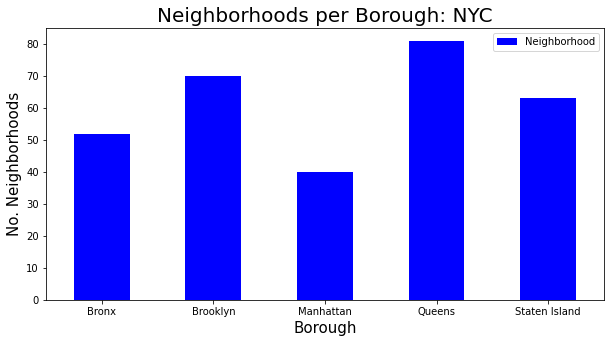

In [26]:

ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color='blue')
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

### We will focus our research in the Borough of Brooklyn, as due his alternative style it could be a better fit for a new studio.

In [27]:
# queens has most neighborhoods
# prepare neighborhood list that contains yoga studios
column_names=['Borough', 'Neighborhood', 'ID','Name']
yoga_studio_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    yoga_studios=venues[venues['Category']=='Yoga Studio']   
    print('(',count,'/',len(ny_data),')','Yoga Studios in '+Neighborhood+', '+Borough+':'+str(len(yoga_studios)))
    print(row)
    for studio in yoga_studios.values.tolist():
        id, name , category=studio
        yoga_studio_ny = yoga_studio_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Yoga Studios in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Yoga Studios in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Yoga Studios in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Yoga Studios in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Yoga Studios in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Yoga Studios in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Yoga Studios in Marble Hill, Manhattan:1
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Yoga Studios in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Yoga Studios in Norwood, Bronx:0
['Bronx', 'Norwood', 40.87722415599446, -73.8793907395681]
( 10 /

KeyError: 'groups'

In [49]:
#yoga_studio_ny.to_csv('yoga_studio_ny_tocsv1.csv') # Save the information so far to a .csv file due to limited calls on FourSquare
yoga_studio_ny.to_csv('yoga_studio_ny.csv')

In [50]:
yoga_studios_ny = pd.read_csv('yoga_studio_ny.csv', index_col=0)
yoga_studios_ny

,Borough,Neighborhood,ID,Name
0,Manhattan,Marble Hill,4baf59e8f964a520a6f93be3,Bikram Yoga
1,Brooklyn,Bay Ridge,4e8e41bf46907a17cc07a24d,Dahn Yoga
2,Brooklyn,Greenpoint,4a9a86dcf964a520cc3120e3,goodyoga
3,Brooklyn,Greenpoint,55b51009498e4c7fd1fea655,New Love City
4,Brooklyn,Sheepshead Bay,4db0dc040437a93f7f7d4c16,Hot Spot Yoga
5,Brooklyn,Windsor Terrace,4c6b40eee13db60cf60ad4b1,Yoga Sole
6,Brooklyn,Prospect Heights,4ab80e06f964a520fe7b20e3,Shambhala Yoga and Dance Center
7,Brooklyn,Williamsburg,54a96fb3498ef8abe4184a51,Laughing Lotus Yoga Center
8,Brooklyn,Brooklyn Heights,4fa968b7e4b07cb43c311f1c,Area Yoga & Spa
9,Brooklyn,Brooklyn Heights,4a5ddf2cf964a520c8bd1fe3,Bikram Yoga Brooklyn Heights


In [30]:
yoga_studios_brooklyn = yoga_studios_ny[yoga_studios_ny['Borough']=='Brooklyn'].reset_index(drop=True)
yoga_studios_brooklyn

,Borough,Neighborhood,ID,Name
0,Brooklyn,Bay Ridge,4e8e41bf46907a17cc07a24d,Dahn Yoga
1,Brooklyn,Greenpoint,4a9a86dcf964a520cc3120e3,goodyoga
2,Brooklyn,Greenpoint,55b51009498e4c7fd1fea655,New Love City
3,Brooklyn,Sheepshead Bay,4db0dc040437a93f7f7d4c16,Hot Spot Yoga
4,Brooklyn,Windsor Terrace,4c6b40eee13db60cf60ad4b1,Yoga Sole
5,Brooklyn,Prospect Heights,4ab80e06f964a520fe7b20e3,Shambhala Yoga and Dance Center
6,Brooklyn,Williamsburg,54a96fb3498ef8abe4184a51,Laughing Lotus Yoga Center
7,Brooklyn,Brooklyn Heights,4fa968b7e4b07cb43c311f1c,Area Yoga & Spa
8,Brooklyn,Brooklyn Heights,4a5ddf2cf964a520c8bd1fe3,Bikram Yoga Brooklyn Heights
9,Brooklyn,Brooklyn Heights,59b1b5e12a7ab6050123b1d5,Heatwise


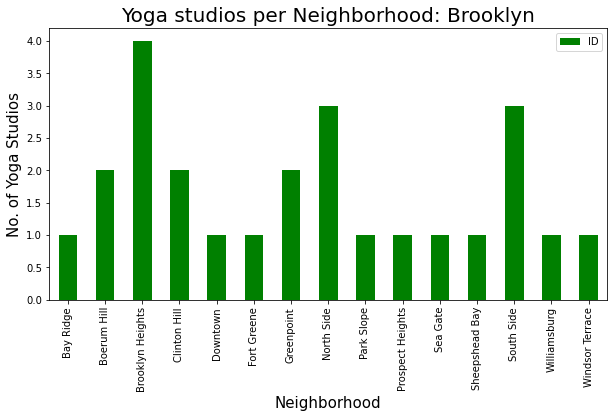

In [38]:

yoga_studios_brooklyn.groupby('Neighborhood')['ID'].count().plot.bar(figsize=(10,5), color='green')
plt.title('Yoga studios per Neighborhood: Brooklyn', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Yoga Studios', fontsize=15)
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

In [39]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
japanese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in yoga_studios_brooklyn.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(yoga_studios_brooklyn),')','processed')
    japanese_rest_stats_ny = japanese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
japanese_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '5faef39871cf843322cc5e1c'}, 'response': {'venue': {'id': '4e8e41bf46907a17cc07a24d', 'name': 'Dahn Yoga', 'contact': {}, 'location': {'address': '8206 3rd Ave', 'lat': 40.626273, 'lng': -74.030208, 'labeledLatLngs': [{'label': 'display', 'lat': 40.626273, 'lng': -74.030208}, {'label': 'entrance', 'lat': 40.626242, 'lng': -74.03008}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8206 3rd Ave', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dahn-yoga/4e8e41bf46907a17cc07a24d', 'categories': [{'id': '4bf58dd8d48988d102941735', 'name': 'Yoga Studio', 'pluralName': 'Yoga Studios', 'shortName': 'Yoga Studio', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_yogastudio_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
20,Brooklyn,North Side,59da542c829b0c160a0a9373,Y7 Studio,36,8.5,1
21,Brooklyn,North Side,4b71b742f964a52027582de3,Sangha Yoga Shala,34,8.8,9
22,Brooklyn,South Side,54a96fb3498ef8abe4184a51,Laughing Lotus Yoga Center,54,8.8,5
23,Brooklyn,South Side,59da542c829b0c160a0a9373,Y7 Studio,36,8.5,1
24,Brooklyn,South Side,58275fad88a1a041b74ddacb,Loom Yoga,8,7.8,0


In [40]:
japanese_rest_stats_ny.to_csv('yoga_studios_ratings.csv') # As I move through this project I continue to save data to a .csv file

In [41]:
yoga_studios_ratings = pd.read_csv('yoga_studios_ratings.csv', index_col=0)
yoga_studios_ratings

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Brooklyn,Bay Ridge,0,0,0,0.0,0
1,Brooklyn,Greenpoint,4a9a86dcf964a520cc3120e3,goodyoga,30,9.0,7
2,Brooklyn,Greenpoint,55b51009498e4c7fd1fea655,New Love City,36,9.0,9
3,Brooklyn,Sheepshead Bay,4db0dc040437a93f7f7d4c16,Hot Spot Yoga,12,7.4,6
4,Brooklyn,Windsor Terrace,0,0,0,0.0,0
5,Brooklyn,Prospect Heights,4ab80e06f964a520fe7b20e3,Shambhala Yoga and Dance Center,39,8.2,9
6,Brooklyn,Williamsburg,54a96fb3498ef8abe4184a51,Laughing Lotus Yoga Center,54,8.8,5
7,Brooklyn,Brooklyn Heights,4fa968b7e4b07cb43c311f1c,Area Yoga & Spa,37,8.4,10
8,Brooklyn,Brooklyn Heights,4a5ddf2cf964a520c8bd1fe3,Bikram Yoga Brooklyn Heights,11,7.8,2
9,Brooklyn,Brooklyn Heights,59b1b5e12a7ab6050123b1d5,Heatwise,21,9.0,1


In [42]:
yoga_studios_ratings = yoga_studios_ratings[yoga_studios_ratings['ID'] != '0'].reset_index(drop=True)
yoga_studios_ratings

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Brooklyn,Greenpoint,4a9a86dcf964a520cc3120e3,goodyoga,30,9.0,7
1,Brooklyn,Greenpoint,55b51009498e4c7fd1fea655,New Love City,36,9.0,9
2,Brooklyn,Sheepshead Bay,4db0dc040437a93f7f7d4c16,Hot Spot Yoga,12,7.4,6
3,Brooklyn,Prospect Heights,4ab80e06f964a520fe7b20e3,Shambhala Yoga and Dance Center,39,8.2,9
4,Brooklyn,Williamsburg,54a96fb3498ef8abe4184a51,Laughing Lotus Yoga Center,54,8.8,5
5,Brooklyn,Brooklyn Heights,4fa968b7e4b07cb43c311f1c,Area Yoga & Spa,37,8.4,10
6,Brooklyn,Brooklyn Heights,4a5ddf2cf964a520c8bd1fe3,Bikram Yoga Brooklyn Heights,11,7.8,2
7,Brooklyn,Brooklyn Heights,59b1b5e12a7ab6050123b1d5,Heatwise,21,9.0,1
8,Brooklyn,Brooklyn Heights,4ae4a75ff964a520c99c21e3,Yoga People,14,7.8,10
9,Brooklyn,Fort Greene,4dfe1b25483b96a3aaab6eb3,The Shala,11,8.4,3


### Downtown and Greenpoint have the best average rating Yoga Studios

In [43]:
ny_neighborhood_stats=yoga_studios_ratings.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False)

,Neighborhood,Average Rating
3,Downtown,9.000000
5,Greenpoint,9.000000
7,Park Slope,8.800000
11,Williamsburg,8.800000
0,Boerum Hill,8.750000
6,North Side,8.700000
4,Fort Greene,8.400000
10,South Side,8.366667
1,Brooklyn Heights,8.250000
8,Prospect Heights,8.200000


### As all of the neighborhoods have really good rating studios, all will join the original New York data to get longitude and latitude.

In [44]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Boerum Hill,40.685683,-73.983748,8.750000
1,Brooklyn,Brooklyn Heights,40.695864,-73.993782,8.250000
2,Brooklyn,Clinton Hill,40.693229,-73.967843,8.000000
3,Brooklyn,Downtown,40.690844,-73.983463,9.000000
4,Brooklyn,Fort Greene,40.688527,-73.972906,8.400000
5,Brooklyn,Greenpoint,40.730201,-73.954241,9.000000
6,Brooklyn,North Side,40.714823,-73.958809,8.700000
7,Brooklyn,Park Slope,40.672321,-73.977050,8.800000
8,Brooklyn,Prospect Heights,40.676822,-73.964859,8.200000
9,Brooklyn,Sheepshead Bay,40.586890,-73.943186,7.400000


### Now we will show this data on a map

In [45]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [46]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

# Conclusion
## There are many good yoga studios in the area of Brooklyn. We could recommend to check neighborhoods as Sheepshead Bay, Clinton Hill, as the ratings of the yoga studios are not the highest and the quantity of yoga studios is low.
### A more comprehensive analysis and future work would need to incorporate data from other external databases.